In [24]:
%matplotlib inline


# Plot different SVM classifiers in the iris dataset

Comparison of different linear SVM classifiers on a 2D projection of the iris
dataset. We only consider the first 2 features of this dataset:

- Sepal length
- Sepal width

This example shows how to plot the decision surface for four SVM classifiers
with different kernels.

The linear models ``LinearSVC()`` and ``SVC(kernel='linear')`` yield slightly
different decision boundaries. This can be a consequence of the following
differences:

- ``LinearSVC`` minimizes the squared hinge loss while ``SVC`` minimizes the
  regular hinge loss.

- ``LinearSVC`` uses the One-vs-All (also known as One-vs-Rest) multiclass
  reduction while ``SVC`` uses the One-vs-One multiclass reduction.

Both linear models have linear decision boundaries (intersecting hyperplanes)
while the non-linear kernel models (polynomial or Gaussian RBF) have more
flexible non-linear decision boundaries with shapes that depend on the kind of
kernel and its parameters.

.. NOTE:: while plotting the decision function of classifiers for toy 2D
   datasets can help get an intuitive understanding of their respective
   expressive power, be aware that those intuitions don't always generalize to
   more realistic high-dimensional problems.


In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

Automatically created module for IPython interactive environment


In [2]:

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [3]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [28]:
# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale')

C = regularization parameter
kernel = {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
degree = int, default=3
Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels

gamma{‘scale’, ‘auto’} or float, default=’scale’
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
if ‘auto’, uses 1 / n_features

In [45]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

In [46]:
# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

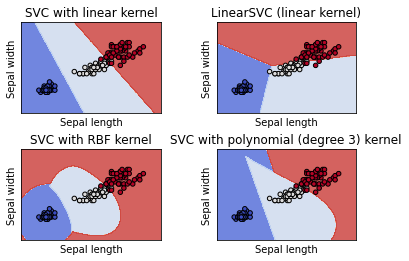

In [47]:
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [4]:
#Different kernel Svm classifer with Petal featuresPython
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the last two features.
y = iris.target
C = 1.0  # SVM regularization parameter


# SVC with linear kernel
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C, max_iter=10000).fit(X, y)
# SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

In [5]:
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
           np.arange(y_min, y_max, h))
# title for the plots
titles = ['SVC with linear kernel',
        'LinearSVC (linear kernel)',
        'SVC with RBF kernel',
       'SVC with polynomial (degree 3) kernel']

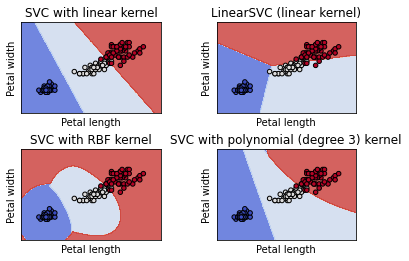

In [6]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
 
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
 
    plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.svm import LinearSVC

clf = LinearSVC(max_iter=1000)
clf.fit(X_train,y_train)

print('Accuracy of linear SVC on training set: {:.2f}'.format(clf.score(X_train, y_train)))

print('Accuracy of linear SVC on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of linear SVC on training set: 0.93
Accuracy of linear SVC on test set: 0.97


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
    
c = np.logspace(start = -15, stop = 1000, base = 1.02)
param_grid = {'C': c}


grid = GridSearchCV(clf, param_grid =param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)
  
print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(X_test, y_test) * 100 ) )

The best parameters are {'C': 847179.6905819052} with a score of 97
Best estimator accuracy on test set 96.67 


/home/mona/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [10]:
from sklearn.svm import SVC

clf_SVC = SVC(C=100.0, kernel='rbf', degree=3, gamma='auto')
clf_SVC.fit(X_train,y_train)

print('Accuracy of SVC on training set: {:.2f}'.format(clf_SVC.score(X_train, y_train) * 100))

print('Accuracy of SVC on test set: {:.2f}'.format(clf_SVC.score(X_test, y_test) * 100))

Accuracy of SVC on training set: 96.67
Accuracy of SVC on test set: 100.00


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
    
c_SVC = np.logspace(start = 0, stop = 10, num = 100, base = 2 , dtype = 'float64')
print( 'the generated array of c values')
print ( c_SVC )
param_grid_S = {'C': c_SVC}



print("\n Array of means \n")
clf = GridSearchCV(clf_SVC, param_grid =param_grid_S, cv=20 , scoring='accuracy')
clf.fit(X_train, y_train)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
print(means)

y_true, y_pred = y_test, clf.predict(X_test)
print("The best parameters are %s" % (grid.best_params_))
print( '\nClassification report\n' )
print(classification_report(y_true, y_pred))

the generated array of c values
[1.00000000e+00 1.07252413e+00 1.15030800e+00 1.23373308e+00
 1.32320850e+00 1.41917304e+00 1.52209732e+00 1.63248610e+00
 1.75088073e+00 1.87786182e+00 2.01405211e+00 2.16011948e+00
 2.31678026e+00 2.48480272e+00 2.66501086e+00 2.85828845e+00
 3.06558332e+00 3.28791207e+00 3.52636502e+00 3.78211156e+00
 4.05640590e+00 4.35059319e+00 4.66611616e+00 5.00452215e+00
 5.36747075e+00 5.75674188e+00 6.17424455e+00 6.62202624e+00
 7.10228290e+00 7.61736977e+00 8.16981285e+00 8.76232139e+00
 9.39780109e+00 1.00793684e+01 1.08103658e+01 1.15943781e+01
 1.24352503e+01 1.33371059e+01 1.43043679e+01 1.53417796e+01
 1.64544288e+01 1.76477719e+01 1.89276611e+01 2.03003732e+01
 2.17726400e+01 2.33516817e+01 2.50452420e+01 2.68616263e+01
 2.88097423e+01 3.08991436e+01 3.31400770e+01 3.55435321e+01
 3.81212958e+01 4.08860094e+01 4.38512315e+01 4.70315038e+01
 5.04424225e+01 5.41007151e+01 5.80243221e+01 6.22324854e+01
 6.67458420e+01 7.15865259e+01 7.67782761e+01 8.23465